In [1]:
# %conda install xoak scikit-learn
# See https://xoak.readthedocs.io/en/latest/examples/introduction.html

In [2]:
import xarray as xr
import xoak
import numpy as np
from matplotlib import pyplot as plt

In [3]:
ds_mm_base = xr.open_dataset(
    "/home/jovyan/shared_materials/model_data/mask/VIKING20X.L46-KKG36107B/mesh_mask.nc"
)
ds_mm_base = ds_mm_base.assign_coords(
    x=np.arange(ds_mm_base.sizes["x"]),
    y=np.arange(ds_mm_base.sizes["y"]),
)

ds_mm_base

<xarray.Dataset>
Dimensions:       (y: 1021, x: 1442, z: 46)
Coordinates:
  * x             (x) int64 0 1 2 3 4 5 6 ... 1435 1436 1437 1438 1439 1440 1441
  * y             (y) int64 0 1 2 3 4 5 6 ... 1014 1015 1016 1017 1018 1019 1020
Dimensions without coordinates: z
Data variables: (12/44)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  float64 ...
    tmask         (z, y, x) int8 ...
    umask         (z, y, x) int8 ...
    ...            ...
    gdepv         (z, y, x) float32 ...
    gdepw_0       (z, y, x) float32 ...
    gdept_1d      (z) float64 ...
    e3t_1d        (z) float64 ...
    e3w_1d        (z) float64 ...
    depthw        (z) float64 ...
Attributes:
    history:  Mon Dec 16 12:54:26 2019: ncrename -v gdepw_1d,depthw /sfs/fs1/...
    NCO:      netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, C...

In [4]:
ds_mm_nest = xr.open_dataset(
    "/home/jovyan/shared_materials/model_data/mask/VIKING20X.L46-KKG36107B/1_mesh_mask.nc"
)
ds_mm_nest = ds_mm_nest.assign_coords(
    x=np.arange(ds_mm_nest.sizes["x"]),
    y=np.arange(ds_mm_nest.sizes["y"]),
)


ds_mm_nest

<xarray.Dataset>
Dimensions:       (y: 2499, x: 2404, z: 46)
Coordinates:
  * x             (x) int64 0 1 2 3 4 5 6 ... 2397 2398 2399 2400 2401 2402 2403
  * y             (y) int64 0 1 2 3 4 5 6 ... 2492 2493 2494 2495 2496 2497 2498
Dimensions without coordinates: z
Data variables: (12/44)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  float64 ...
    tmask         (z, y, x) int8 ...
    umask         (z, y, x) int8 ...
    ...            ...
    gdepv         (z, y, x) float32 ...
    gdepw_0       (z, y, x) float32 ...
    gdept_1d      (z) float64 ...
    e3t_1d        (z) float64 ...
    e3w_1d        (z) float64 ...
    depthw        (z) float64 ...
Attributes:
    history:  Mon Dec 16 12:47:29 2019: ncrename -v gdepw_1d,depthw /sfs/fs1/...
    NCO:      netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, C...

## Find lower left corner and upper right corner

In [5]:
lon_ll_nest = ds_mm_nest.glamt.isel(x=0, y=0)
lat_ll_nest = ds_mm_nest.gphit.isel(x=0, y=0)
lon_ur_nest = ds_mm_nest.glamt.isel(x=-1, y=-1)
lat_ur_nest = ds_mm_nest.gphit.isel(x=-1, y=-1)

In [6]:
lon_ll_nest.data[()], lat_ll_nest.data[()], lon_ur_nest.data[()], lat_ur_nest.data[()], 

(-98.45, -34.007175, 32.311337, 61.40659)

In [7]:
ds_mm_base = ds_mm_base.set_coords(["gphit", "glamt"])
ds_mm_base.xoak.set_index(["gphit", "glamt"], "sklearn_geo_balltree")

In [8]:
ll_base = ds_mm_base.xoak.sel(gphit=lat_ll_nest, glamt=lon_ll_nest)[["x", "y"]]
ur_base = ds_mm_base.xoak.sel(gphit=lat_ur_nest, glamt=lon_ur_nest)[["x", "y"]]

In [9]:
x_ll, y_ll = ll_base.x.data[()], ll_base.y.data[()]
x_ur, y_ur = ur_base.x.data[()], ur_base.y.data[()]

In [10]:
ds_mm_base_nested = ds_mm_base.sel(
    x=slice(x_ll, x_ur + 1),
    y=slice(y_ll, y_ur + 1),
)
ds_mm_base_nested

<xarray.Dataset>
Dimensions:       (y: 502, x: 483, z: 46)
Coordinates:
    glamt         (y, x) float32 -98.5 -98.25 -98.0 -97.75 ... 32.29 32.52 32.74
    gphit         (y, x) float32 -34.05 -34.05 -34.05 ... 61.58 61.51 61.43
  * x             (x) int64 755 756 757 758 759 760 ... 1233 1234 1235 1236 1237
  * y             (y) int64 353 354 355 356 357 358 ... 849 850 851 852 853 854
Dimensions without coordinates: z
Data variables: (12/42)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  float64 ...
    tmask         (z, y, x) int8 ...
    umask         (z, y, x) int8 ...
    ...            ...
    gdepv         (z, y, x) float32 ...
    gdepw_0       (z, y, x) float32 ...
    gdept_1d      (z) float64 ...
    e3t_1d        (z) float64 ...
    e3w_1d        (z) float64 ...
    depthw        (z) float64 ...
Attributes:
    history:  Mon Dec 16 12:54:26 2019: ncrename -v gdepw_1d,depthw /sfs/fs1/...
    NCO:      netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, C...

In [11]:
ds_base = xr.open_dataset(
    "/home/jovyan/shared_materials/model_data/VIKING20X.L46-KKG36107B/VIKING20X.L46-KKG36107B_1m_19900101_19901231_grid_T.nc"
)
ds_base = ds_base.assign_coords(
    x=np.arange(ds_base.sizes["x"]),
    y=np.arange(ds_base.sizes["y"]),
)

ds_base

<xarray.Dataset>
Dimensions:               (y: 1021, x: 1442, deptht: 46, axis_nbounds: 2,
                           time_counter: 12)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 3.047 9.454 ... 5.625e+03 5.875e+03
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 1990-01-16T12:00:00 ....
  * x                     (x) int64 0 1 2 3 4 5 ... 1437 1438 1439 1440 1441
  * y                     (y) int64 0 1 2 3 4 5 ... 1016 1017 1018 1019 1020
Dimensions without coordinates: axis_nbounds
Data variables: (12/17)
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    votemper              (time_counter, deptht, y, x) float32 ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sosstsst              (time_counter, y, x) float32 ...
    ...                    ...
    sohefldo              (time_counter, y, x) float32 ...
    somixhgt              (time_counter, y, x) float32 ...
    sowindsp              (time_counter, y, x) float32 ...
    sohefldp              (time_counter, y, x) float32 ...
    sowafldp              (time_counter, y, x) float32 ...
    sobowlin              (time_counter, y, x) float32 ...
Attributes:
    name:                      VIKING20X.L46-KKG36107B_1d_19900101_19900704_g...
    description:               ocean T grid variables
    title:                     ocean T grid variables
    Conventions:               CF-1.6
    timeStamp:                 2019-Sep-09 21:00:01 GMT
    uuid:                      1b0b92e5-33ce-481a-9335-1cdf0e56b562
    history:                   Tue Sep 10 18:50:02 2019: ncrcat -O -F /gfs1/w...
    NCO:                       4.4.8
    nco_openmp_thread_number:  1

In [12]:
ds_nest = xr.open_dataset(
    "/home/jovyan/shared_materials/model_data/VIKING20X.L46-KKG36107B/1_VIKING20X.L46-KKG36107B_1m_19900101_19901231_grid_T.nc"
)
ds_nest = ds_nest.assign_coords(
    x=np.arange(ds_nest.sizes["x"]),
    y=np.arange(ds_nest.sizes["y"]),
)

ds_nest

<xarray.Dataset>
Dimensions:               (y: 2499, x: 2404, deptht: 46, axis_nbounds: 2,
                           time_counter: 12)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 3.047 9.454 ... 5.625e+03 5.875e+03
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 1990-01-16T12:00:00 ....
  * x                     (x) int64 0 1 2 3 4 5 ... 2399 2400 2401 2402 2403
  * y                     (y) int64 0 1 2 3 4 5 ... 2494 2495 2496 2497 2498
Dimensions without coordinates: axis_nbounds
Data variables: (12/17)
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    votemper              (time_counter, deptht, y, x) float32 ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sosstsst              (time_counter, y, x) float32 ...
    ...                    ...
    sohefldo              (time_counter, y, x) float32 ...
    somixhgt              (time_counter, y, x) float32 ...
    sowindsp              (time_counter, y, x) float32 ...
    sohefldp              (time_counter, y, x) float32 ...
    sowafldp              (time_counter, y, x) float32 ...
    sobowlin              (time_counter, y, x) float32 ...
Attributes:
    name:                      1_VIKING20X.L46-KKG36107B_1d_19900101_19900704...
    description:               ocean T grid variables
    title:                     ocean T grid variables
    Conventions:               CF-1.6
    timeStamp:                 2019-Sep-09 21:00:09 GMT
    uuid:                      6d2ef8ce-e19a-4cd5-9c73-ce86996a49da
    history:                   Tue Sep 10 18:50:03 2019: ncrcat -O -F /gfs1/w...
    NCO:                       4.4.8
    nco_openmp_thread_number:  1

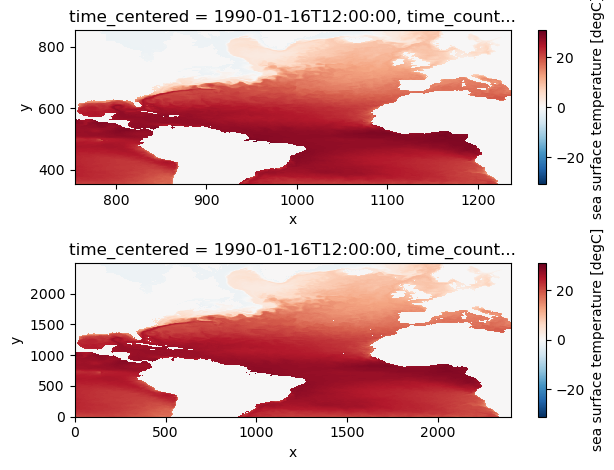

In [13]:
fig, ax = plt.subplots(2, 1)

ds_base.isel(time_counter=0, x=slice(x_ll, x_ur + 1), y=slice(y_ll, y_ur + 1)).sosstsst.plot(
    ax=ax[0],
)

ds_nest.isel(time_counter=0).sosstsst.plot(
    ax=ax[1],
)

fig.tight_layout()

In [14]:
(ds_mm_base_nested.e1t * ds_mm_base_nested.e2t).where(ds_mm_base_nested.tmaskutil == 1).sum()

<xarray.DataArray ()>
array(8.26571223e+13)

In [15]:
(ds_mm_nest.e1t * ds_mm_nest.e2t).where(ds_mm_nest.tmaskutil == 1).sum()

<xarray.DataArray ()>
array(8.08526508e+13)